In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [119]:
train_cleaned = pd.read_csv("./data/train_cleaned.csv")

In [120]:
eq1_df = train_cleaned[
    (train_cleaned['Equipment_Dam'] == 'Dam dispenser #1') &
    (train_cleaned['Equipment_Fill1'] == 'Fill1 dispenser #1') &
    (train_cleaned['Equipment_Fill2'] == 'Fill2 dispenser #1')
]

# 삭제할 열 리스트 - 범주형 변수 삭제(Production Qty는 혹시 모르니까 남겨둠)
columns_to_drop = [
    'Model.Suffix', 
    'Equipment_Dam', 
    'Chamber Temp. Judge Value_AutoClave', 
    'Equipment_Fill1', 
    'Equipment_Fill2', 
    'PalletID Collect Result_Dam', 
    'PalletID Collect Result_Fill1', 
    'PalletID Collect Result_Fill2'
]

# 열 삭제
eq1_df = eq1_df.drop(columns=columns_to_drop)

In [121]:
eq2_df = train_cleaned[
    (train_cleaned['Equipment_Dam'] == 'Dam dispenser #2') &
    (train_cleaned['Equipment_Fill1'] == 'Fill1 dispenser #2') &
    (train_cleaned['Equipment_Fill2'] == 'Fill2 dispenser #2')
]

# 삭제할 열 리스트 - 범주형 변수 삭제(Production Qty는 혹시 모르니까 남겨둠)
columns_to_drop = [
    'Model.Suffix', 
    'Equipment_Dam', 
    'Chamber Temp. Judge Value_AutoClave', 
    'Equipment_Fill1', 
    'Equipment_Fill2', 
    'PalletID Collect Result_Dam', 
    'PalletID Collect Result_Fill1', 
    'PalletID Collect Result_Fill2'
]

# 열 삭제
eq2_df = eq2_df.drop(columns=columns_to_drop)

In [122]:
# 데이터프레임이 비어 있는지 확인
print(f"eq1_df shape: {eq1_df.shape}")

# 결측치가 있는 열만 출력
null_columns = eq1_df.isnull().sum()
null_columns = null_columns[null_columns > 0]

null_columns

eq1_df shape: (25011, 83)


Series([], dtype: int64)

In [123]:
# target 열에서 NaN 값이 몇 개인지 확인
nan_count = eq1_df['target'].isnull().sum()
print(f"'target' 열에 존재하는 NaN 값의 수: {nan_count}")

# NaN 값이 포함된 행들 확인
nan_rows = eq1_df[eq1_df['target'].isnull()]
print("NaN 값이 포함된 행들:")
print(nan_rows)

'target' 열에 존재하는 NaN 값의 수: 0
NaN 값이 포함된 행들:
Empty DataFrame
Columns: [CURE END POSITION X Collect Result_Dam, CURE END POSITION Z Collect Result_Dam, CURE SPEED Collect Result_Dam, CURE START POSITION X Collect Result_Dam, CURE START POSITION Θ Collect Result_Dam, DISCHARGED SPEED OF RESIN Collect Result_Dam, DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam, DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam, DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam, Dispense Volume(Stage1) Collect Result_Dam, Dispense Volume(Stage2) Collect Result_Dam, Dispense Volume(Stage3) Collect Result_Dam, HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam, HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam, HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam, HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam, HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam, HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam, HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Resu

장비1에 해당하는 제품들 주성분분석 - 3개 주성분

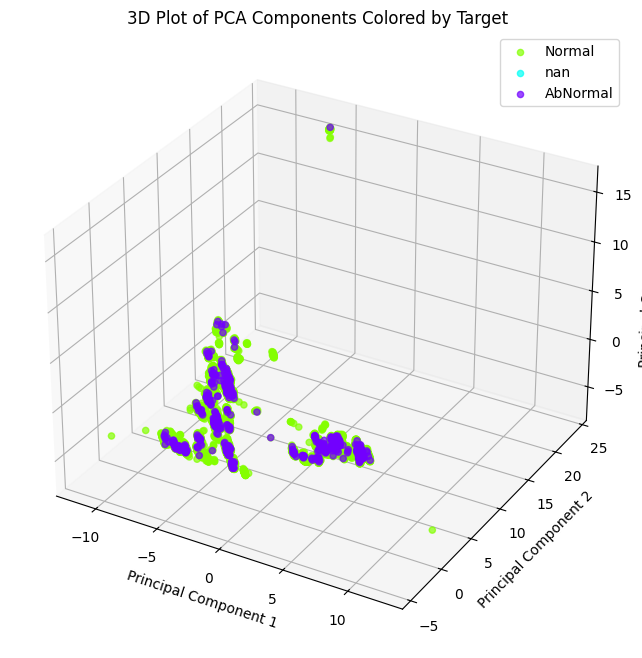

In [124]:
# 데이터 준비
X = eq1_df.drop('target', axis=1)  # 타겟 열 제외
y = eq1_df['target']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['target'] = y

# 3D 플롯 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 타겟에 따라 색상 설정
targets = pca_df['target'].unique()
colors = sns.color_palette("hsv", len(targets))

for target, color in zip(targets, colors):
    subset = pca_df[pca_df['target'] == target]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], 
               color=color, label=str(target), alpha=0.7)

# 라벨 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Plot of PCA Components Colored by Target')

# 범례 추가
ax.legend()

# 플롯 출력
plt.show()

장비1에 해당하는 제품들 주성분분석 - 2개 주성분

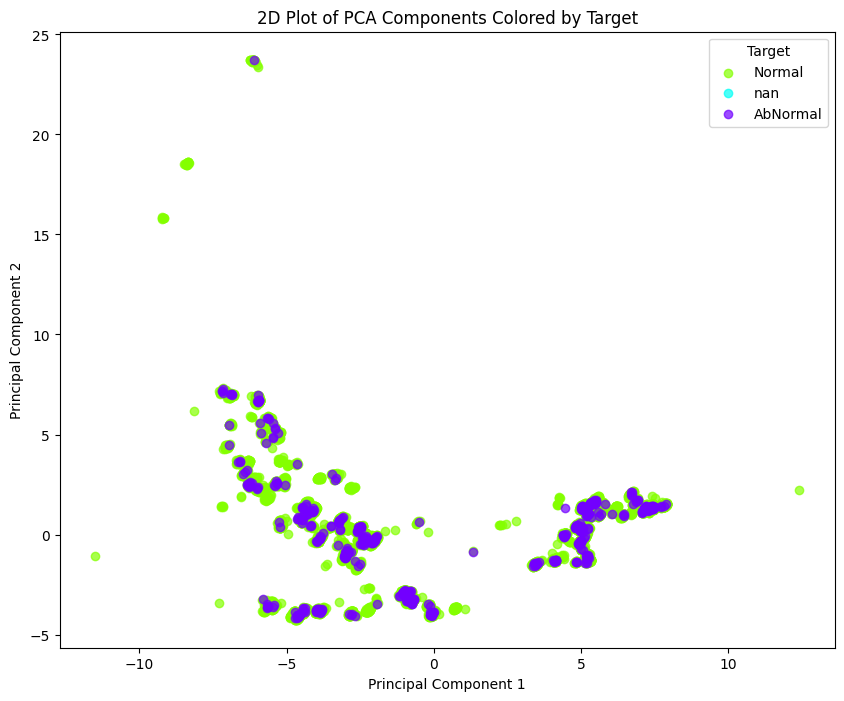

In [125]:
# 데이터 준비
X = eq1_df.drop('target', axis=1)  # 타겟 열 제외
y = eq1_df['target']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행 (2개의 주성분으로)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

# 2D 플롯 생성
fig, ax = plt.subplots(figsize=(10, 8))

# 타겟에 따라 색상 설정
targets = pca_df['target'].unique()
colors = sns.color_palette("hsv", len(targets))

for target, color in zip(targets, colors):
    subset = pca_df[pca_df['target'] == target]
    ax.scatter(subset['PC1'], subset['PC2'], 
               color=color, label=str(target), alpha=0.7)

# 라벨 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D Plot of PCA Components Colored by Target')

# 범례 추가
ax.legend(title="Target")

# 플롯 출력
plt.show()

장비2에 해당하는 제품들 주성분분석 - 3개 주성분

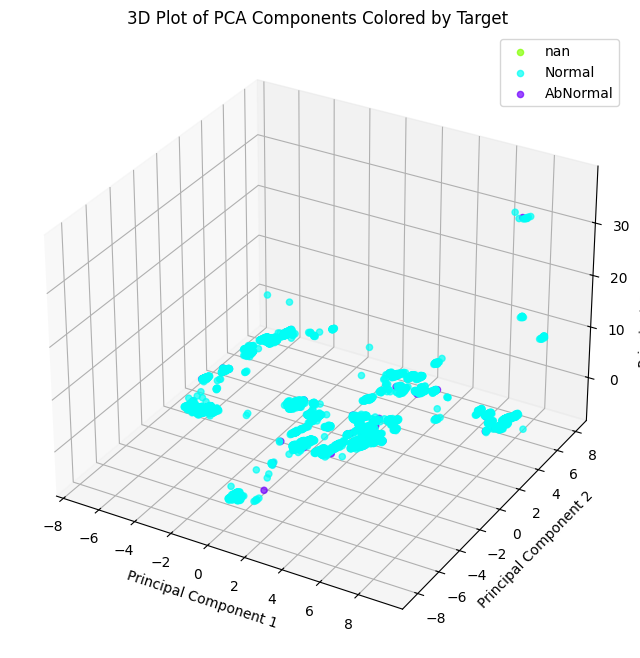

In [126]:
# 데이터 준비
X = eq2_df.drop('target', axis=1)  # 타겟 열 제외
y = eq2_df['target']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['target'] = y

# 3D 플롯 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 타겟에 따라 색상 설정
targets = pca_df['target'].unique()
colors = sns.color_palette("hsv", len(targets))

for target, color in zip(targets, colors):
    subset = pca_df[pca_df['target'] == target]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], 
               color=color, label=str(target), alpha=0.7)

# 라벨 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Plot of PCA Components Colored by Target')

# 범례 추가
ax.legend()

# 플롯 출력
plt.show()

장비2에 해당하는 제품들 주성분분석 - 2개 주성분

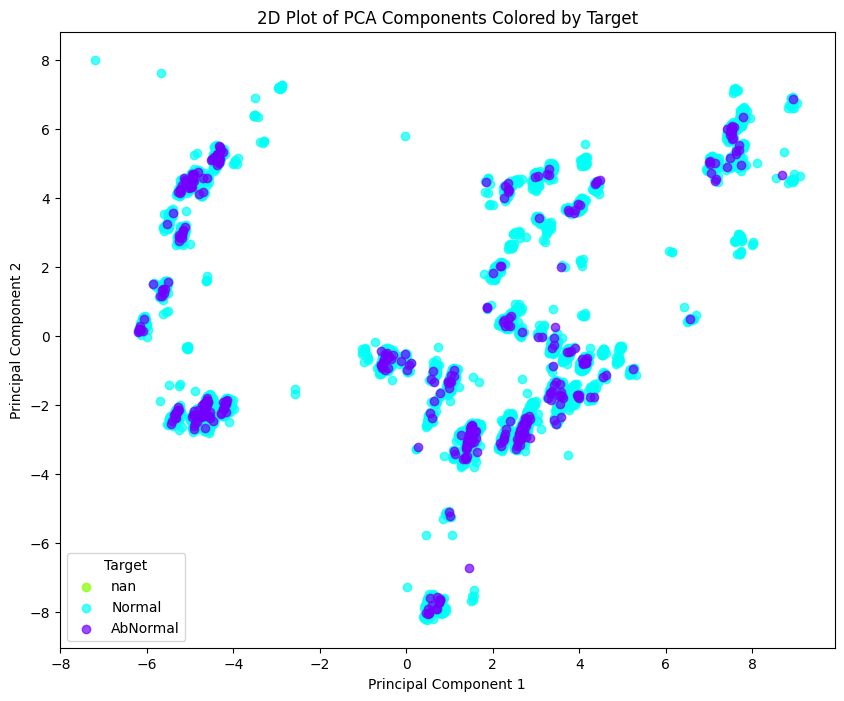

In [127]:
# 데이터 준비
X = eq2_df.drop('target', axis=1)  # 타겟 열 제외
y = eq2_df['target']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행 (2개의 주성분으로)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

# 2D 플롯 생성
fig, ax = plt.subplots(figsize=(10, 8))

# 타겟에 따라 색상 설정
targets = pca_df['target'].unique()
colors = sns.color_palette("hsv", len(targets))

for target, color in zip(targets, colors):
    subset = pca_df[pca_df['target'] == target]
    ax.scatter(subset['PC1'], subset['PC2'], 
               color=color, label=str(target), alpha=0.7)

# 라벨 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D Plot of PCA Components Colored by Target')

# 범례 추가
ax.legend(title="Target")

# 플롯 출력
plt.show()

장비1에 해당하는 Normal, AbNormal 제품들 각각 주성분분석 - 3개 주성분

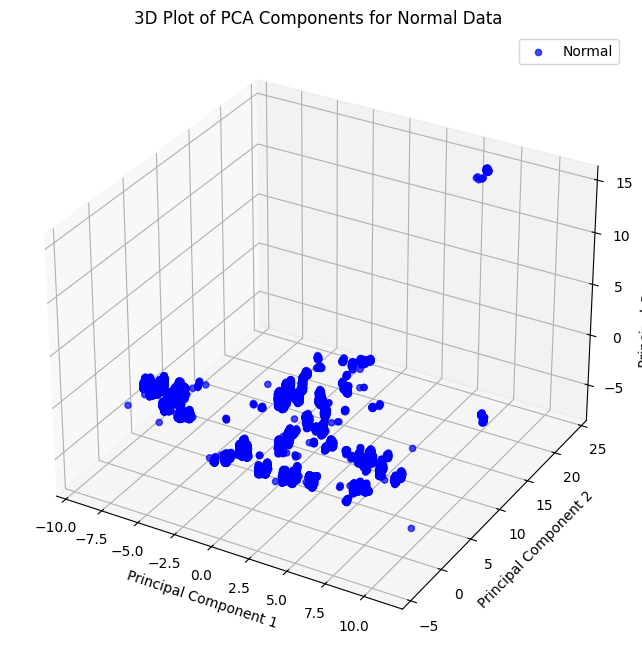

In [128]:
# 1. 데이터 필터링
filtered_df = eq1_df[eq1_df['target'] == 'Normal']

# 데이터 준비
X = filtered_df.drop('target', axis=1)  # 타겟 열 제외
y = filtered_df['target']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['target'] = y

# 3D 플롯 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 색상 설정 (여기서는 하나의 레이블만 있으므로 색상 설정은 단일 색상으로 설정)
color = 'blue'  # 하나의 색상으로 설정
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
           color=color, label='Normal', alpha=0.7)

# 라벨 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Plot of PCA Components for Normal Data')

# 범례 추가
ax.legend()

# 플롯 출력
plt.show()

In [129]:
# 주성분 로드잉스 추출
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 로드잉스를 데이터프레임으로 변환
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=X.columns)

# 각 주성분별로 값이 큰 순서대로 정렬하여 출력
print("PCA Loadings (sorted by absolute value for each PC):")
for pc in ['PC1', 'PC2', 'PC3']:
    sorted_loadings_df = loadings_df[[pc]].abs().sort_values(by=pc, ascending=False)
    print(f"\nPrincipal Component {pc}:")
    print(sorted_loadings_df)

# 각 주성분별로 가장 영향을 많이 준 5개 열 추출
top_features = {}
for pc in ['PC1', 'PC2', 'PC3']:
    top_features[pc] = loadings_df[[pc]].abs().nlargest(5, pc).index.tolist()

# 결과 출력
print("\nTop 5 features for each Principal Component:")
for pc, features in top_features.items():
    print(f"{pc}: {features}")

PCA Loadings (sorted by absolute value for each PC):

Principal Component PC1:
                                                         PC1
Stage2 Line2 Distance Speed Collect Result_Dam      0.910773
Stage2 Circle1 Distance Speed Collect Result_Dam    0.910766
Stage2 Line1 Distance Speed Collect Result_Dam      0.908787
Stage2 Line3 Distance Speed Collect Result_Dam      0.908762
DISCHARGED TIME OF RESIN(Stage2) Collect Result...  0.864687
...                                                      ...
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect R...  0.000000
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect R...  0.000000
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect R...  0.000000
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect R...  0.000000
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect R...  0.000000

[82 rows x 1 columns]

Principal Component PC2:
                                                         PC2
Head Purge Position Z Collect Result_Fill2          0.588238
HEAD NORMAL COORDI

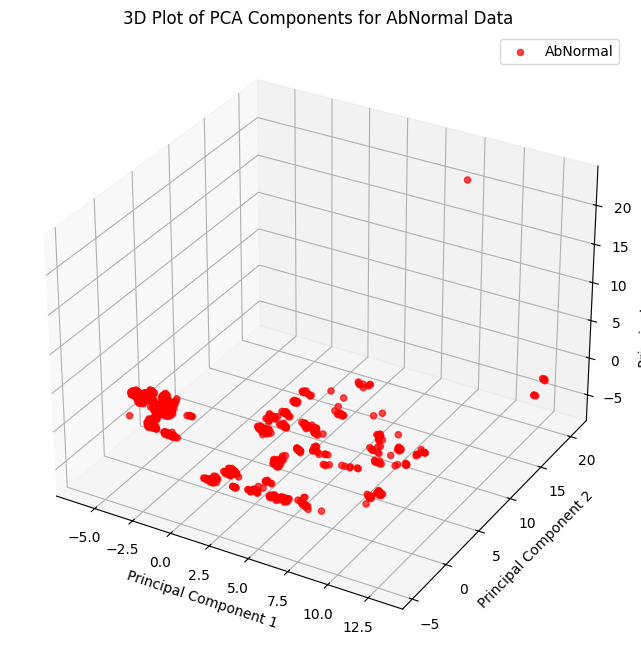

In [130]:
# 1. 데이터 필터링
filtered_df = eq1_df[eq1_df['target'] == 'AbNormal']

# 데이터 준비
X = filtered_df.drop('target', axis=1)  # 타겟 열 제외
y = filtered_df['target']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['target'] = y

# 3D 플롯 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 색상 설정 (여기서는 하나의 레이블만 있으므로 색상 설정은 단일 색상으로 설정)
color = 'red'  # 하나의 색상으로 설정
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
           color=color, label='AbNormal', alpha=0.7)

# 라벨 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Plot of PCA Components for AbNormal Data')

# 범례 추가
ax.legend()

# 플롯 출력
plt.show()

In [132]:
# 주성분 로드잉스 추출
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 로드잉스를 데이터프레임으로 변환
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=X.columns)

# 각 주성분별로 값이 큰 순서대로 정렬하여 출력
print("PCA Loadings (sorted by absolute value for each PC):")
for pc in ['PC1', 'PC2', 'PC3']:
    sorted_loadings_df = loadings_df[[pc]].abs().sort_values(by=pc, ascending=False)
    print(f"\nPrincipal Component {pc}:")
    print(sorted_loadings_df)

# 각 주성분별로 가장 영향을 많이 준 5개 열 추출
top_features = {}
for pc in ['PC1', 'PC2', 'PC3']:
    top_features[pc] = loadings_df[[pc]].abs().nlargest(5, pc).index.tolist()

# 결과 출력
print("\nTop 5 features for each Principal Component:")
for pc, features in top_features.items():
    print(f"{pc}: {features}")

PCA Loadings (sorted by absolute value for each PC):

Principal Component PC1:
                                                         PC1
Stage2 Line2 Distance Speed Collect Result_Dam      0.898500
Stage2 Circle1 Distance Speed Collect Result_Dam    0.898474
Stage2 Line1 Distance Speed Collect Result_Dam      0.897394
Stage2 Line3 Distance Speed Collect Result_Dam      0.897362
DISCHARGED TIME OF RESIN(Stage2) Collect Result...  0.892575
...                                                      ...
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect R...  0.000000
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect R...  0.000000
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect R...  0.000000
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect R...  0.000000
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect R...  0.000000

[82 rows x 1 columns]

Principal Component PC2:
                                                         PC2
HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect R...  0.647828
HEAD NORMAL COORDI

장비1에 해당하는 Normal, AbNormal 제품들 각각 주성분분석 - 2개 주성분

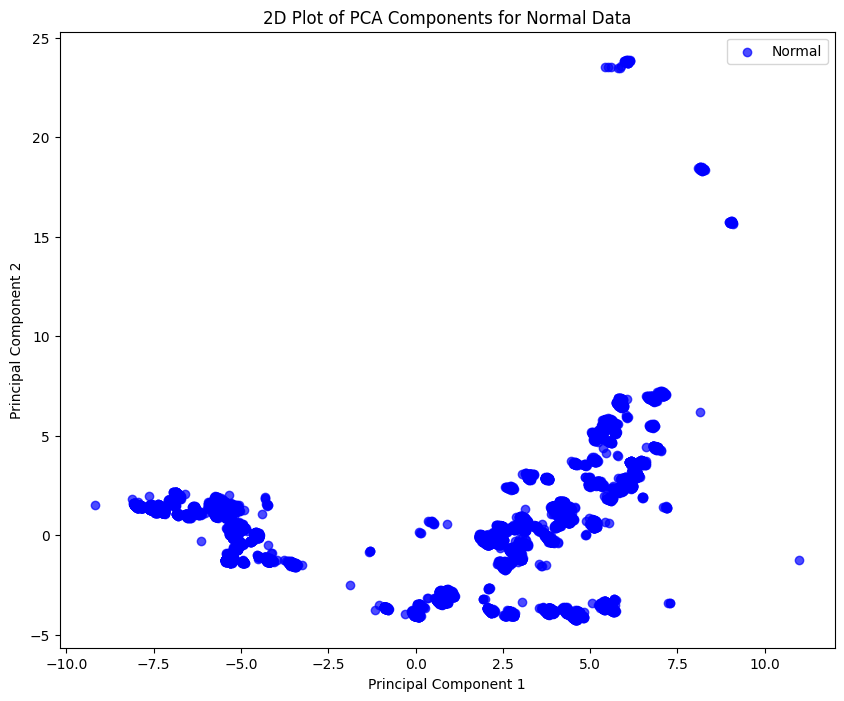

In [133]:
# 1. 데이터 필터링
filtered_df = eq1_df[eq1_df['target'] == 'Normal']

# 데이터 준비
X = filtered_df.drop('target', axis=1)  # 타겟 열 제외
y = filtered_df['target']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행 (2개의 주성분으로)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

# 2D 플롯 생성
fig, ax = plt.subplots(figsize=(10, 8))

# 색상 설정 (하나의 레이블만 있으므로 단일 색상으로 설정)
color = 'blue'  # 하나의 색상으로 설정
ax.scatter(pca_df['PC1'], pca_df['PC2'], 
           color=color, label='Normal', alpha=0.7)

# 라벨 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D Plot of PCA Components for Normal Data')

# 범례 추가
ax.legend()

# 플롯 출력
plt.show()

In [134]:
# 주성분 로드잉스 추출
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 로드잉스를 데이터프레임으로 변환 (2개의 주성분만 사용)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns)

# 각 주성분별로 값이 큰 순서대로 정렬하여 출력
print("PCA Loadings (sorted by absolute value for each PC):")
for pc in ['PC1', 'PC2']:
    sorted_loadings_df = loadings_df[[pc]].abs().sort_values(by=pc, ascending=False)
    print(f"\nPrincipal Component {pc}:")
    print(sorted_loadings_df)

# 각 주성분별로 가장 영향을 많이 준 5개 열 추출
top_features = {}
for pc in ['PC1', 'PC2']:
    top_features[pc] = loadings_df[[pc]].abs().nlargest(5, pc).index.tolist()

# 결과 출력
print("\nTop 5 features for each Principal Component:")
for pc, features in top_features.items():
    print(f"{pc}: {features}")

PCA Loadings (sorted by absolute value for each PC):

Principal Component PC1:
                                                         PC1
Stage2 Line2 Distance Speed Collect Result_Dam      0.910773
Stage2 Circle1 Distance Speed Collect Result_Dam    0.910766
Stage2 Line1 Distance Speed Collect Result_Dam      0.908787
Stage2 Line3 Distance Speed Collect Result_Dam      0.908762
DISCHARGED TIME OF RESIN(Stage2) Collect Result...  0.864687
...                                                      ...
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect R...  0.000000
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect R...  0.000000
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect R...  0.000000
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect R...  0.000000
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect R...  0.000000

[82 rows x 1 columns]

Principal Component PC2:
                                                         PC2
Head Purge Position Z Collect Result_Fill2          0.588238
HEAD NORMAL COORDI

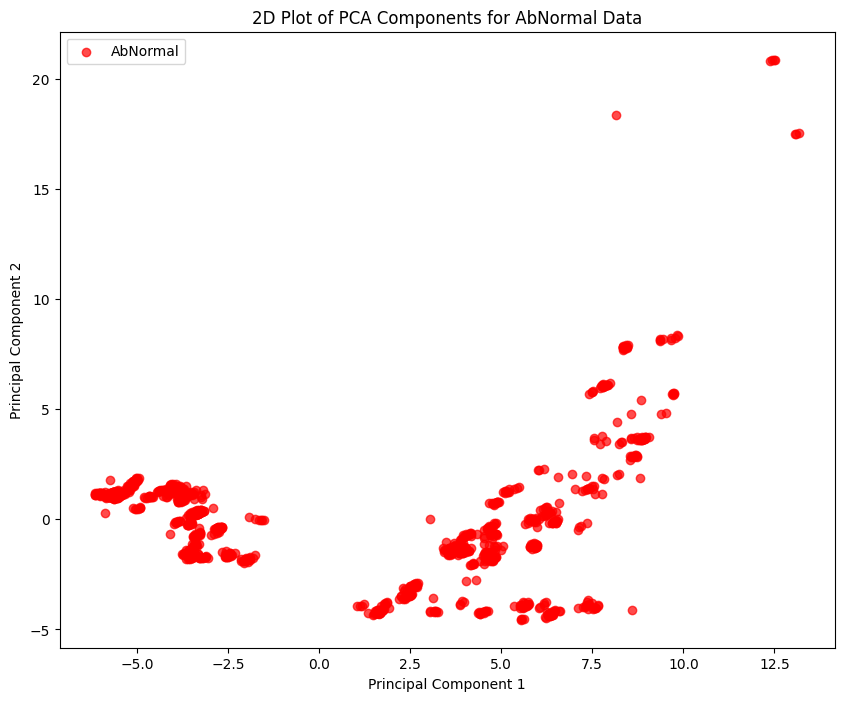

In [145]:
# 1. 데이터 필터링
filtered_df = eq1_df[eq1_df['target'] == 'AbNormal']

# 데이터 준비
X = filtered_df.drop('target', axis=1)  # 타겟 열 제외
y = filtered_df['target']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행 (2개의 주성분으로)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

# 2D 플롯 생성
fig, ax = plt.subplots(figsize=(10, 8))

# 색상 설정 (하나의 레이블만 있으므로 단일 색상으로 설정)
color = 'red'  # 하나의 색상으로 설정
ax.scatter(pca_df['PC1'], pca_df['PC2'], 
           color=color, label='AbNormal', alpha=0.7)

# 라벨 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D Plot of PCA Components for AbNormal Data')

# 범례 추가
ax.legend()

# 플롯 출력
plt.show()

In [136]:
# 주성분 로드잉스 추출
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 로드잉스를 데이터프레임으로 변환 (2개의 주성분만 사용)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns)

# 각 주성분별로 값이 큰 순서대로 정렬하여 출력
print("PCA Loadings (sorted by absolute value for each PC):")
for pc in ['PC1', 'PC2']:
    sorted_loadings_df = loadings_df[[pc]].abs().sort_values(by=pc, ascending=False)
    print(f"\nPrincipal Component {pc}:")
    print(sorted_loadings_df)

# 각 주성분별로 가장 영향을 많이 준 5개 열 추출
top_features = {}
for pc in ['PC1', 'PC2']:
    top_features[pc] = loadings_df[[pc]].abs().nlargest(5, pc).index.tolist()

# 결과 출력
print("\nTop 5 features for each Principal Component:")
for pc, features in top_features.items():
    print(f"{pc}: {features}")

PCA Loadings (sorted by absolute value for each PC):

Principal Component PC1:
                                                         PC1
Stage2 Line2 Distance Speed Collect Result_Dam      0.898500
Stage2 Circle1 Distance Speed Collect Result_Dam    0.898474
Stage2 Line1 Distance Speed Collect Result_Dam      0.897394
Stage2 Line3 Distance Speed Collect Result_Dam      0.897362
DISCHARGED TIME OF RESIN(Stage2) Collect Result...  0.892575
...                                                      ...
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect R...  0.000000
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect R...  0.000000
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect R...  0.000000
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect R...  0.000000
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect R...  0.000000

[82 rows x 1 columns]

Principal Component PC2:
                                                         PC2
HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect R...  0.647828
HEAD NORMAL COORDI

장비2에 해당하는 Normal, AbNormal 제품들 각각 주성분분석 - 3개 주성분

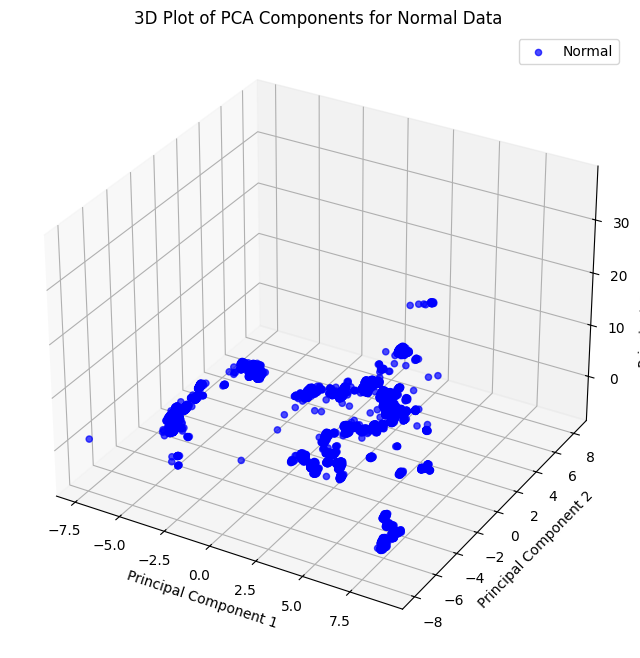

In [137]:
# 1. 데이터 필터링
filtered_df = eq2_df[eq2_df['target'] == 'Normal']

# 데이터 준비
X = filtered_df.drop('target', axis=1)  # 타겟 열 제외
y = filtered_df['target']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['target'] = y

# 3D 플롯 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 색상 설정 (여기서는 하나의 레이블만 있으므로 색상 설정은 단일 색상으로 설정)
color = 'blue'  # 하나의 색상으로 설정
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
           color=color, label='Normal', alpha=0.7)

# 라벨 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Plot of PCA Components for Normal Data')

# 범례 추가
ax.legend()

# 플롯 출력
plt.show()

In [138]:
# 주성분 로드잉스 추출
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 로드잉스를 데이터프레임으로 변환
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=X.columns)

# 각 주성분별로 값이 큰 순서대로 정렬하여 출력
print("PCA Loadings (sorted by absolute value for each PC):")
for pc in ['PC1', 'PC2', 'PC3']:
    sorted_loadings_df = loadings_df[[pc]].abs().sort_values(by=pc, ascending=False)
    print(f"\nPrincipal Component {pc}:")
    print(sorted_loadings_df)

# 각 주성분별로 가장 영향을 많이 준 5개 열 추출
top_features = {}
for pc in ['PC1', 'PC2', 'PC3']:
    top_features[pc] = loadings_df[[pc]].abs().nlargest(5, pc).index.tolist()

# 결과 출력
print("\nTop 5 features for each Principal Component:")
for pc, features in top_features.items():
    print(f"{pc}: {features}")

PCA Loadings (sorted by absolute value for each PC):

Principal Component PC1:
                                                             PC1
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect R...  8.674235e-01
DISCHARGED SPEED OF RESIN Collect Result_Dam        8.607503e-01
Chamber Temp. Unit Time_AutoClave                   8.472309e-01
2nd Pressure Unit Time_AutoClave                    8.455689e-01
Head Purge Position Z Collect Result_Fill1          8.426379e-01
...                                                          ...
CURE START POSITION Θ Collect Result_Dam            3.728277e-22
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect R...  0.000000e+00
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect R...  0.000000e+00
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect R...  0.000000e+00
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect R...  0.000000e+00

[82 rows x 1 columns]

Principal Component PC2:
                                                             PC2
Machine Tact time Collect R

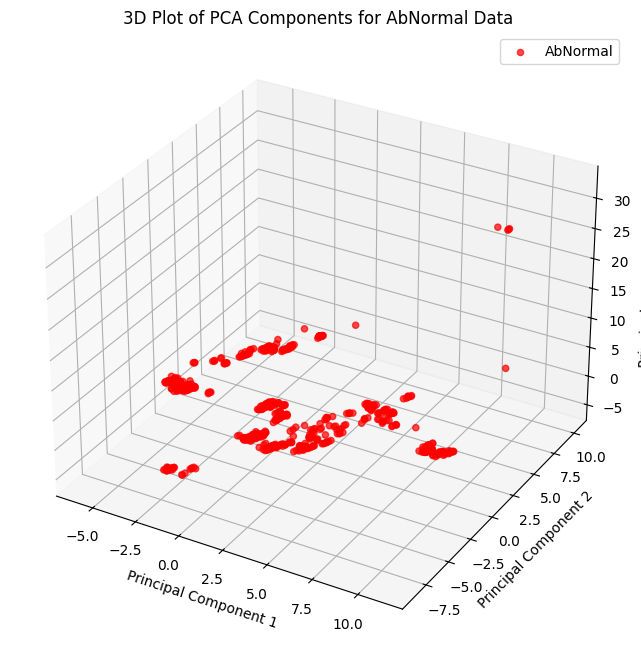

In [139]:
# 1. 데이터 필터링
filtered_df = eq2_df[eq2_df['target'] == 'AbNormal']

# 데이터 준비
X = filtered_df.drop('target', axis=1)  # 타겟 열 제외
y = filtered_df['target']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['target'] = y

# 3D 플롯 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 색상 설정 (여기서는 하나의 레이블만 있으므로 색상 설정은 단일 색상으로 설정)
color = 'red'  # 하나의 색상으로 설정
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
           color=color, label='AbNormal', alpha=0.7)

# 라벨 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Plot of PCA Components for AbNormal Data')

# 범례 추가
ax.legend()

# 플롯 출력
plt.show()

In [140]:
# 주성분 로드잉스 추출
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 로드잉스를 데이터프레임으로 변환
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=X.columns)

# 각 주성분별로 값이 큰 순서대로 정렬하여 출력
print("PCA Loadings (sorted by absolute value for each PC):")
for pc in ['PC1', 'PC2', 'PC3']:
    sorted_loadings_df = loadings_df[[pc]].abs().sort_values(by=pc, ascending=False)
    print(f"\nPrincipal Component {pc}:")
    print(sorted_loadings_df)

# 각 주성분별로 가장 영향을 많이 준 5개 열 추출
top_features = {}
for pc in ['PC1', 'PC2', 'PC3']:
    top_features[pc] = loadings_df[[pc]].abs().nlargest(5, pc).index.tolist()

# 결과 출력
print("\nTop 5 features for each Principal Component:")
for pc, features in top_features.items():
    print(f"{pc}: {features}")

PCA Loadings (sorted by absolute value for each PC):

Principal Component PC1:
                                                         PC1
DISCHARGED SPEED OF RESIN Collect Result_Dam        0.825028
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect R...  0.820037
2nd Pressure Unit Time_AutoClave                    0.804394
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect R...  0.793888
Head Purge Position Z Collect Result_Fill1          0.787800
...                                                      ...
CURE END POSITION Z Collect Result_Fill2            0.000000
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect R...  0.000000
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect R...  0.000000
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect R...  0.000000
Head Purge Position Z Collect Result_Dam            0.000000

[82 rows x 1 columns]

Principal Component PC2:
                                                         PC2
Stage1 Line3 Distance Speed Collect Result_Dam      0.837114
DISCHARGED TIME OF

장비2에 해당하는 Normal, AbNormal 제품들 각각 주성분분석 - 2개 주성분

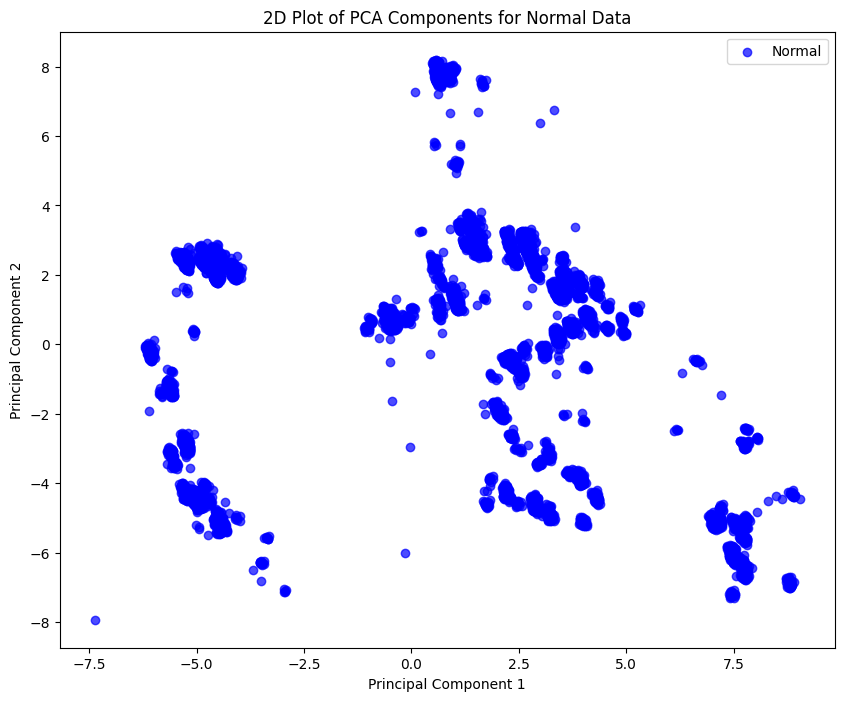

In [141]:
# 1. 데이터 필터링
filtered_df = eq2_df[eq2_df['target'] == 'Normal']

# 데이터 준비
X = filtered_df.drop('target', axis=1)  # 타겟 열 제외
y = filtered_df['target']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행 (2개의 주성분으로)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

# 2D 플롯 생성
fig, ax = plt.subplots(figsize=(10, 8))

# 색상 설정 (하나의 레이블만 있으므로 단일 색상으로 설정)
color = 'blue'  # 하나의 색상으로 설정
ax.scatter(pca_df['PC1'], pca_df['PC2'], 
           color=color, label='Normal', alpha=0.7)

# 라벨 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D Plot of PCA Components for Normal Data')

# 범례 추가
ax.legend()

# 플롯 출력
plt.show()

In [142]:
# 주성분 로드잉스 추출
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 로드잉스를 데이터프레임으로 변환 (2개의 주성분만 사용)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns)

# 각 주성분별로 값이 큰 순서대로 정렬하여 출력
print("PCA Loadings (sorted by absolute value for each PC):")
for pc in ['PC1', 'PC2']:
    sorted_loadings_df = loadings_df[[pc]].abs().sort_values(by=pc, ascending=False)
    print(f"\nPrincipal Component {pc}:")
    print(sorted_loadings_df)

# 각 주성분별로 가장 영향을 많이 준 5개 열 추출
top_features = {}
for pc in ['PC1', 'PC2']:
    top_features[pc] = loadings_df[[pc]].abs().nlargest(5, pc).index.tolist()

# 결과 출력
print("\nTop 5 features for each Principal Component:")
for pc, features in top_features.items():
    print(f"{pc}: {features}")

PCA Loadings (sorted by absolute value for each PC):

Principal Component PC1:
                                                             PC1
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect R...  8.674235e-01
DISCHARGED SPEED OF RESIN Collect Result_Dam        8.607503e-01
Chamber Temp. Unit Time_AutoClave                   8.472309e-01
2nd Pressure Unit Time_AutoClave                    8.455689e-01
Head Purge Position Z Collect Result_Fill1          8.426379e-01
...                                                          ...
CURE START POSITION X Collect Result_Dam            4.989115e-22
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect R...  0.000000e+00
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect R...  0.000000e+00
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect R...  0.000000e+00
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect R...  0.000000e+00

[82 rows x 1 columns]

Principal Component PC2:
                                                             PC2
Machine Tact time Collect R

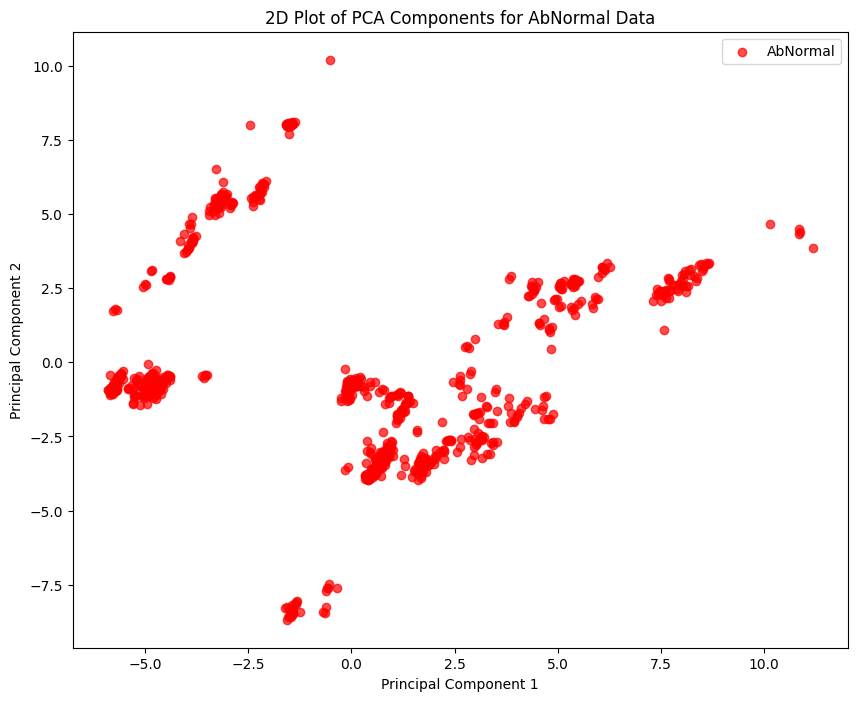

In [146]:
# 1. 데이터 필터링
filtered_df = eq2_df[eq2_df['target'] == 'AbNormal']

# 데이터 준비
X = filtered_df.drop('target', axis=1)  # 타겟 열 제외
y = filtered_df['target']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행 (2개의 주성분으로)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

# 2D 플롯 생성
fig, ax = plt.subplots(figsize=(10, 8))

# 색상 설정 (하나의 레이블만 있으므로 단일 색상으로 설정)
color = 'red'  # 하나의 색상으로 설정
ax.scatter(pca_df['PC1'], pca_df['PC2'], 
           color=color, label='AbNormal', alpha=0.7)

# 라벨 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D Plot of PCA Components for AbNormal Data')

# 범례 추가
ax.legend()

# 플롯 출력
plt.show()

In [144]:
# 주성분 로드잉스 추출
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 로드잉스를 데이터프레임으로 변환 (2개의 주성분만 사용)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns)

# 각 주성분별로 값이 큰 순서대로 정렬하여 출력
print("PCA Loadings (sorted by absolute value for each PC):")
for pc in ['PC1', 'PC2']:
    sorted_loadings_df = loadings_df[[pc]].abs().sort_values(by=pc, ascending=False)
    print(f"\nPrincipal Component {pc}:")
    print(sorted_loadings_df)

# 각 주성분별로 가장 영향을 많이 준 5개 열 추출
top_features = {}
for pc in ['PC1', 'PC2']:
    top_features[pc] = loadings_df[[pc]].abs().nlargest(5, pc).index.tolist()

# 결과 출력
print("\nTop 5 features for each Principal Component:")
for pc, features in top_features.items():
    print(f"{pc}: {features}")

PCA Loadings (sorted by absolute value for each PC):

Principal Component PC1:
                                                         PC1
DISCHARGED SPEED OF RESIN Collect Result_Dam        0.825028
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect R...  0.820037
2nd Pressure Unit Time_AutoClave                    0.804394
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect R...  0.793888
Head Purge Position Z Collect Result_Fill1          0.787800
...                                                      ...
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect R...  0.000000
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect R...  0.000000
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect R...  0.000000
CURE END POSITION Z Collect Result_Fill2            0.000000
Head Purge Position Z Collect Result_Dam            0.000000

[82 rows x 1 columns]

Principal Component PC2:
                                                         PC2
Stage1 Line3 Distance Speed Collect Result_Dam      0.837114
DISCHARGED TIME OF

In [ ]:
sdw

### 모든 열에 대해 -> 'target'이 'AbNormal'인 행만 가지고 3차원 그려보기

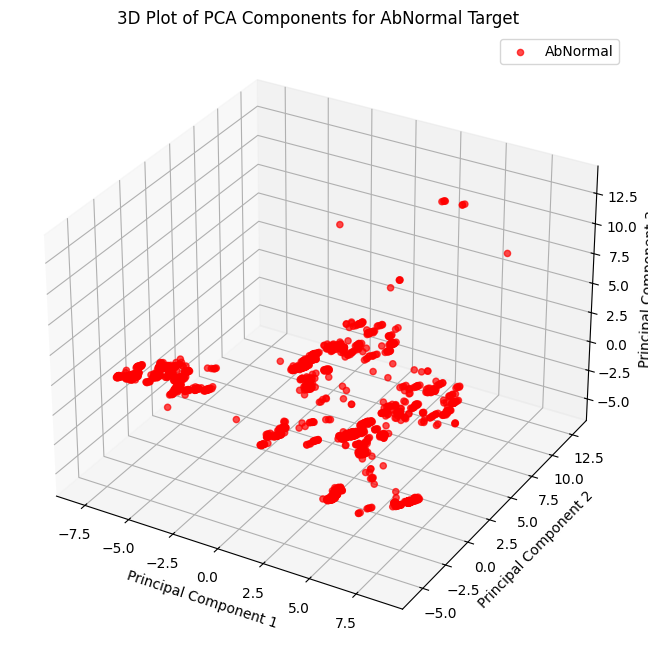

In [ ]:
# 데이터 준비
X = train_cleaned_no_categorical.drop('target', axis=1)  # 타겟 열 제외
y = train_cleaned_no_categorical['target']

# 'AbNormal' 데이터만 선택
X_abnormal = X[y == 'AbNormal']
y_abnormal = y[y == 'AbNormal']

# 데이터 표준화
scaler = StandardScaler()
X_scaled_abnormal = scaler.fit_transform(X_abnormal)

# PCA 수행
pca = PCA(n_components=3)
X_pca_abnormal = pca.fit_transform(X_scaled_abnormal)

# PCA 결과를 데이터프레임으로 변환
pca_df_abnormal = pd.DataFrame(X_pca_abnormal, columns=['PC1', 'PC2', 'PC3'])
pca_df_abnormal['target'] = y_abnormal

# 3D 플롯 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 데이터가 'AbNormal'만 포함되어 있으므로, 색상 설정은 필요 없지만 색상은 기본값으로 설정
ax.scatter(pca_df_abnormal['PC1'], pca_df_abnormal['PC2'], pca_df_abnormal['PC3'], 
           color='r', label='AbNormal', alpha=0.7)

# 라벨 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Plot of PCA Components for AbNormal Target')

# 범례 추가
ax.legend()

# 플롯 출력
plt.show()

### 각 주성분이 어떤 변수들의 영향을 많이 받았는지 체크 -> 상위 5개

In [ ]:
# 주성분 로드잉스 추출
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 로드잉스를 데이터프레임으로 변환
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=X.columns)

# 각 주성분별로 값이 큰 순서대로 정렬하여 출력
print("PCA Loadings for 'AbNormal' data (sorted by absolute value for each PC):")
for pc in ['PC1', 'PC2', 'PC3']:
    sorted_loadings_df = loadings_df[[pc]].abs().sort_values(by=pc, ascending=False)
    print(f"\nPrincipal Component {pc}:")
    print(sorted_loadings_df)

# 각 주성분별로 가장 영향을 많이 준 5개 열 추출
top_features = {}
for pc in ['PC1', 'PC2', 'PC3']:
    top_features[pc] = loadings_df[[pc]].abs().nlargest(5, pc).index.tolist()

# 결과 출력
print("\nTop 5 features for each Principal Component (for 'AbNormal' data):")
for pc, features in top_features.items():
    print(f"{pc}: {features}")

PCA Loadings for 'AbNormal' data (sorted by absolute value for each PC):

Principal Component PC1:
                                                         PC1
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect R...  0.902350
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect R...  0.852180
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect R...  0.852005
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect R...  0.851585
HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect R...  0.851562
...                                                      ...
HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect R...  0.024435
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect R...  0.023860
Dispense Volume(Stage1) Collect Result_Fill1        0.020399
Chamber Temp. Collect Result_AutoClave              0.010475
DISCHARGED TIME OF RESIN(Stage1) Collect Result...  0.000709

[79 rows x 1 columns]

Principal Component PC2:
                                                         PC2
HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect R...  0.54413

### Dam 과 관련된 data를 가지고 3차원 시각화

C:\Users\my pc\AppData\Local\Temp\ipykernel_2600\3973971658.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dam_df['target'] = train_cleaned_no_categorical['target']


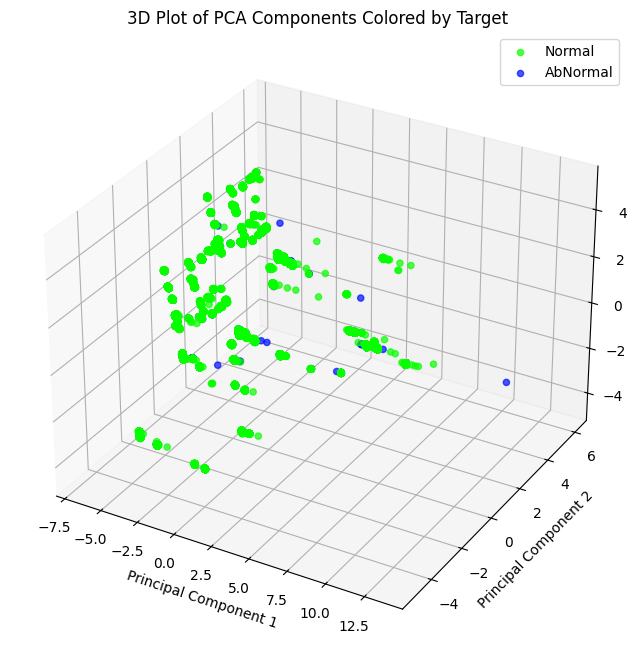

In [ ]:
# '_Dam'이 포함된 열들 선택
dam_columns = [col for col in train_cleaned_no_categorical.columns if '_Dam' in col]
dam_df = train_cleaned_no_categorical[dam_columns]

# 타겟 열 추가
dam_df['target'] = train_cleaned_no_categorical['target']

# 데이터 준비
X = dam_df.drop('target', axis=1)  # 'target' 열 제외
y = dam_df['target']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['target'] = y

# 3D 플롯 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 타겟에 따라 색상 설정
targets = pca_df['target'].unique()
colors = sns.color_palette("hsv", len(targets))

for target, color in zip(targets, colors):
    subset = pca_df[pca_df['target'] == target]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], 
               color=color, label=str(target), alpha=0.7)

# 라벨 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Plot of PCA Components Colored by Target')

# 범례 추가
ax.legend()

# 플롯 출력
plt.show()

### Fill1과 관련된 data를 가지고 3차원 시각화

C:\Users\my pc\AppData\Local\Temp\ipykernel_2600\599793548.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill1_df['target'] = train_cleaned_no_categorical['target']


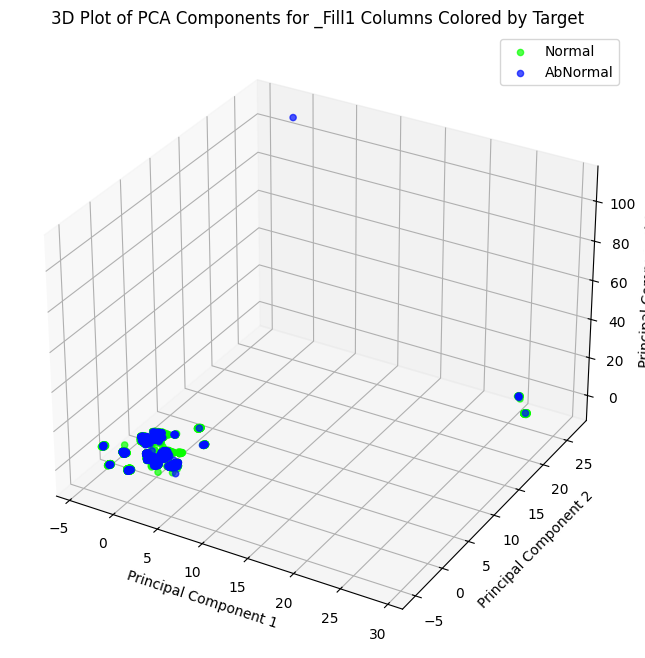

In [ ]:
# '_Fill1'이 포함된 열들 선택
fill1_columns = [col for col in train_cleaned_no_categorical.columns if '_Fill1' in col]
fill1_df = train_cleaned_no_categorical[fill1_columns]

# 타겟 열 추가
fill1_df['target'] = train_cleaned_no_categorical['target']

# 데이터 준비
X = fill1_df.drop('target', axis=1)  # 'target' 열 제외
y = fill1_df['target']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['target'] = y

# 3D 플롯 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 타겟에 따라 색상 설정
targets = pca_df['target'].unique()
colors = sns.color_palette("hsv", len(targets))

for target, color in zip(targets, colors):
    subset = pca_df[pca_df['target'] == target]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], 
               color=color, label=str(target), alpha=0.7)

# 라벨 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Plot of PCA Components for _Fill1 Columns Colored by Target')

# 범례 추가
ax.legend()

# 플롯 출력
plt.show()

### Fill2와 관련된 data를 가지고 3차원 시각화

C:\Users\my pc\AppData\Local\Temp\ipykernel_2600\4121850335.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill2_df['target'] = train_cleaned_no_categorical['target']


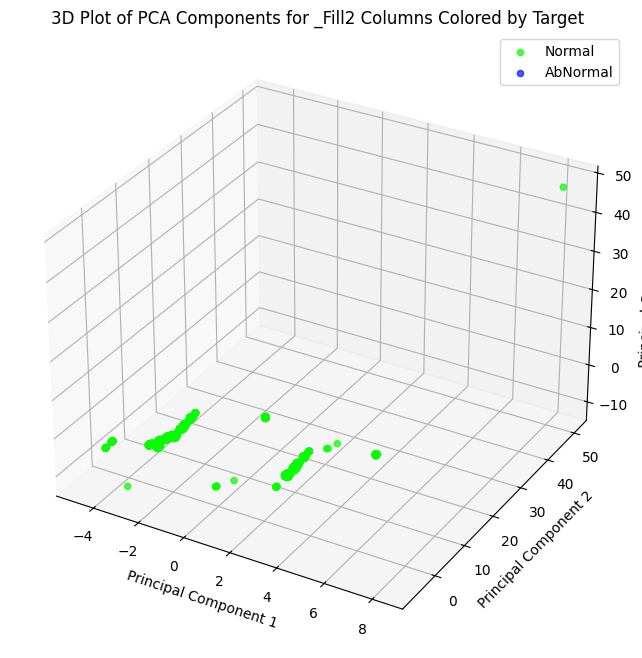

In [ ]:
# '_Fill2'가 포함된 열들 선택
fill2_columns = [col for col in train_cleaned_no_categorical.columns if '_Fill2' in col]
fill2_df = train_cleaned_no_categorical[fill2_columns]

# 타겟 열 추가
fill2_df['target'] = train_cleaned_no_categorical['target']

# 데이터 준비
X = fill2_df.drop('target', axis=1)  # 'target' 열 제외
y = fill2_df['target']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['target'] = y

# 3D 플롯 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 타겟에 따라 색상 설정
targets = pca_df['target'].unique()
colors = sns.color_palette("hsv", len(targets))

for target, color in zip(targets, colors):
    subset = pca_df[pca_df['target'] == target]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], 
               color=color, label=str(target), alpha=0.7)

# 라벨 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Plot of PCA Components for _Fill2 Columns Colored by Target')

# 범례 추가
ax.legend()

# 플롯 출력
plt.show()

### Auto Clave와 관련된 data를 가지고 3차원 시각화

C:\Users\my pc\AppData\Local\Temp\ipykernel_2600\2444677869.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autoclave_df['target'] = train_cleaned_no_categorical['target']


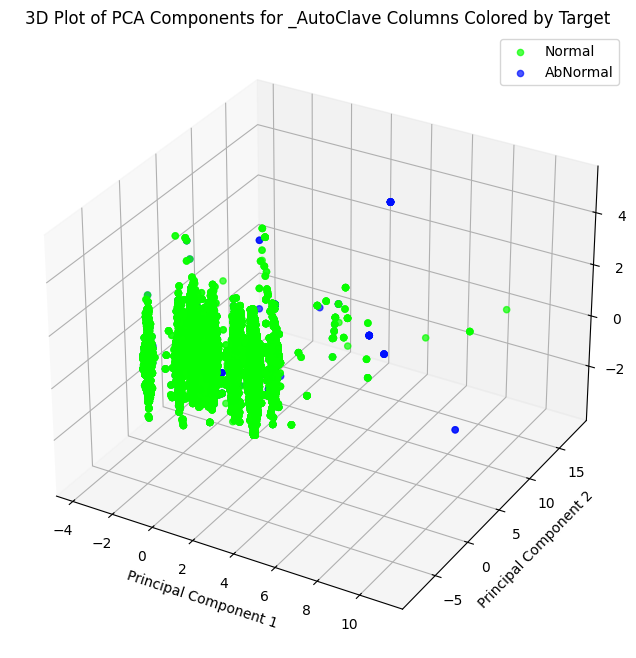

In [ ]:
# '_AutoClave'이 포함된 열들 선택
autoclave_columns = [col for col in train_cleaned_no_categorical.columns if '_AutoClave' in col]
autoclave_df = train_cleaned_no_categorical[autoclave_columns]

# 타겟 열 추가
autoclave_df['target'] = train_cleaned_no_categorical['target']

# 데이터 준비
X = autoclave_df.drop('target', axis=1)  # 'target' 열 제외
y = autoclave_df['target']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['target'] = y

# 3D 플롯 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 타겟에 따라 색상 설정
targets = pca_df['target'].unique()
colors = sns.color_palette("hsv", len(targets))

for target, color in zip(targets, colors):
    subset = pca_df[pca_df['target'] == target]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], 
               color=color, label=str(target), alpha=0.7)

# 라벨 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Plot of PCA Components for _AutoClave Columns Colored by Target')

# 범례 추가
ax.legend()

# 플롯 출력
plt.show()